Dieses Skript visualisiert die Metainformationen der Patienten.

In [40]:
import pyedflib
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

unique_patient_files = set()
df = pd.DataFrame(columns=['sex', 'birthdate', 'name', 'age'])

for root, dirs, files in os.walk('../../../../tuar/edf/'):
    for file in files:
        # If the patient name did not occur yet, add the edf file path to the set
        if file.endswith('.edf') and file.split('_')[0] not in {os.path.basename(f).split('_')[0] for f in unique_patient_files}:
            unique_patient_files.add(os.path.join(root, file))

for i, file in enumerate(unique_patient_files):
    reader = pyedflib.EdfReader(file)
    if reader.patient:
        # Cast bytes to string and remove leading b' and trailing '
        splits = str(reader.patient)[2:-1].split(' ')
        df.loc[i] = [splits[1], splits[2], splits[3], splits[4].split(':')[-1]]
    reader.close()


- Notizen
    - Leider sind die Header der EDF Dateien stets leer. Daher muss auf das Attribut `patient` zurückgegriffen werden.

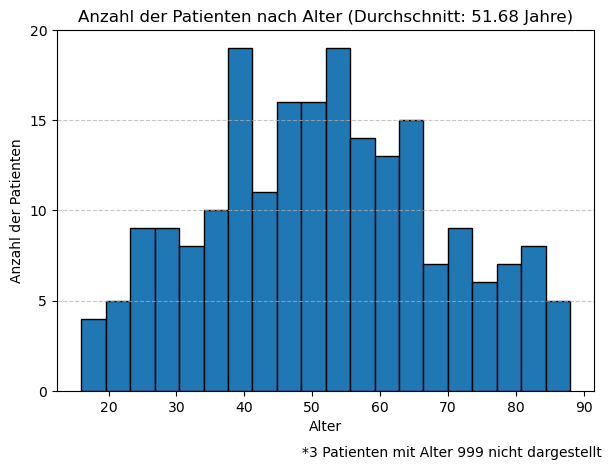

In [52]:

relevant_age_data = df[df['age'].astype(int) < 100]['age'].astype(int)
mean = np.mean(relevant_age_data).round(2)

fig, axes = plt.subplots()

axes.hist(relevant_age_data, edgecolor='black', bins=20)
axes.set_title(f"Anzahl der Patienten nach Alter (Durchschnitt: {mean} Jahre)")
axes.set_xlabel('Alter')
axes.set_ylabel('Anzahl der Patienten')
axes.set_yticks(np.arange(0, 25, 5))
axes.grid(True, axis='y', linestyle='--', alpha=0.7)

#plt.annotate("3 Patienten mit Alter 999 nicht dargestellt", xy=(70, 15), xytext=(50, 25))
fig.text(0.5, 0.01, "*3 Patienten mit Alter 999 nicht dargestellt")

plt.tight_layout(pad=2.0)
plt.savefig('output/exp_01_07_age_distribution.svg')
plt.show()

- Bemerkungen
    - Drei Patienten haben das Alter `999`. Diese werden im Histogramm weggelassen.

- Notizen
    - Die Altersverteilung wirkt auf mich ziemlich repräsentativ verteilt, wobei der Altersdurchschnitt etwas höher liegen sollte als der tatsächliche Durchschnitt.

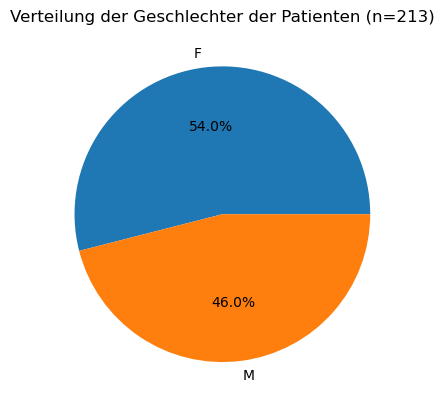

In [57]:
sex_counts = df['sex'].value_counts()

plt.title(f"Verteilung der Geschlechter der Patienten (n={np.sum(sex_counts)})")
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.savefig('output/exp_01_07_gender_distribution.svg')
plt.show()

- Notizen
    - Alle Patienten scheinen `M` oder `F` als Geschlecht zu haben.
    - Relativ gleiche Aufteilung zwischen den Geschlechtern.